# Data Science Intern At LetsGrowMore

## LGMVIP - JAN 2023

## TASK 1 - MUSIC RECOMMENDATION SYSTEM

Music recommender systems can suggest songs to users based on their listening patterns. 

Dataset Link : https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data

### Author - Diwakar Chaurasia

## Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dateaset

In [6]:
ntr = 7000
nts = 3000
data_path = r"C:\Users\DIWAKAR DC\Desktop\Python\Task 4 LGM\train.csv"
train = pd.read_csv(data_path, nrows=ntr) # The "nrows" parameter is set to "ntr" which is 7000, so it will only read the first 7000 rows of the CSV file.
It then assigns the column names to a list called "names".
names = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target']


In [11]:
test_1 = pd.read_csv(data_path, names = names, skiprows=ntr, nrows=nts) #The "skiprows" parameter set to "ntr" (7000) and "nrows" parameter set to "nts" (3000),
                                                                          #so it will only read the next 3000 rows of the CSV file after skipping the first 7000 rows.
songs = pd.read_csv(r"C:\Users\DIWAKAR DC\Desktop\Python\Task 4 LGM\songs.csv")
members = pd.read_csv(r"C:\Users\DIWAKAR DC\Desktop\Python\Task 4 LGM\members.csv")

### Train dataset

In [12]:
train.head(10) #It will display the first 10 rows of the DataFrame "train"

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [13]:
train.sample(10) #It will display 10 random rows of the DataFrame "train"

,msno,song_id,source_system_tab,source_screen_name,source_type,target
2787,iX9nMljT1aIgjhsNXX2OrQjpk2tKAytzxOtlrmoNLck=,DWBkFM/9um2gkf+jl+UO6KhfKEaCqpapzAoH2FJMXzg=,my library,Local playlist more,local-playlist,1
1845,lkJSv2uZYgjUD6bSVXdQy9D7pv7v3sz0xnsEbUHb+WU=,qMMsXRl6fypngvHJ9BwwEp1W4kucQqwdnK8Hd836s5k=,listen with,Others profile more,listen-with,0
6525,BPKBTRQOmt2ck9A0aElqNMkiMazTjIIrA+SmvqZaSLE=,66NCw1qHAROy0PiUC1tPNmGYqRvBSfvGUsO+46BooDc=,my library,Local playlist more,local-library,1
1935,VcIWrELd4L0Obh3wisQ6enBqPs3lmYVbt7lUMmx5NdE=,0u5diiI/25AqwBAAfmwWKBfTLkS2+NHaYcROpdptSwA=,my library,Local playlist more,local-playlist,1
4845,pzs6AnaFO4XJHdPBPCMNFJvy1flQQZc4nhqSnuqz8Ck=,V9/8OekAraynZmjSAU5yrwhmgja3rEc16dPQn09f0DA=,my library,Local playlist more,local-library,1
5886,bk3aAKE/S4hBv4Hvd0fgTTdUZECzN6ku+7AYcYkhXjM=,yGjERMipXDPu/kolTRIMxCsxiRSRVvs4AEBEewslRKM=,my library,Local playlist more,local-library,1
5294,jsjjibq2vnu52RXXNCgVVsNDRCTMNCUaoI21+CCB9PQ=,tvKmPn9LaGGeaakiXRcrCFF5Ix8xWTKxcWBTe8BTYi4=,my library,Local playlist more,local-library,1
6973,/KA6Yy38e1K2QkuUA9IZh/2tIRGPNwrW5GVoKOd7+4Y=,WXXdZGly85dqDs8w5l+W9a0+0Vb5Aj8wnWkwA1Pfb6Q=,discover,Discover Feature,online-playlist,0
2189,pHecJVO4wWLFElV2D36iA/bkuvrAnXf7EM+xCwEMee0=,aApCc1k8OD3bTCyzGUYrW8WqZCKHt4KvA/YWUAtr89A=,discover,Online playlist more,online-playlist,0
5233,NS3mfWA2Y2duu/MEOx/2ULcC7Unnlx+S5uB3Tlk37SI=,jFUlstiDM/0JBpQz1N1Mr1uJj0H8kiQsJjfbnx45gHs=,explore,Explore,online-playlist,0


In [15]:
train.shape #The tuple contains the number of rows and columns in the DataFrame.

(7000, 6)

In [17]:
train.info() #It displays a summary of the DataFrame "train" on the output, including the column names, data types, and number of non-null values for each column, and the memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [18]:
train.columns #It displays the name of all columns 

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [19]:
train.describe() #It will display the descriptive statistics of the DataFrame "train"

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
train.isnull().sum() #It will display the number of missing values in each column of the DataFrame "train" in the output.

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

### Songs Dataset

In [22]:
songs.head(10) #It will display the first 10 rows of the DataFrame "songs"

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [23]:
songs.sample(10) #It will display 10 random rows of the DataFrame "songs"

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1151078,AqjRW5iXDrojRQkrn5KdAvQBZofU1ZYXi2cBXCApzgA=,103746,2122,Billy Vaughn,Malie| Finch| Little,NaN,52.0
1204282,YZYMOZQVp6V3L1k482aOFq5Whn9U7w7gmnPPHiDgtQE=,62415,893,Cyber Orchestra,Stevens,NaN,52.0
984302,dop7bt92xanA/fz+eKEkm8TjFZ+xX5bIgE4KNL9Il0I=,140016,465,Denis Craw,James Arthur,Neil Ormandu,52.0
1880848,51zJ5LGVTVvgDze8jW0G5Pi8h1S+yrnQ8cZptXnU23U=,185991,NaN,Sleep Baby Sleep,Michael Nyman,NaN,-1.0
705756,GQeFfbm8QNvGD9GBTxutZkq3sLzSPlT+R/Ap2KZGa8E=,532852,958,Alessio Bax| Southbank Sinfonia,NaN,NaN,-1.0
573440,kv1Sx5N/ytOfBPPVQ1iipEUG6OOqniJLZMwqXDxh7Vc=,337606,2122,Lou Donaldson,NaN,NaN,-1.0
989910,vQ6huvyk3chIP9CkzmTfR1NRvVvuuKmGOLjX1Fl9AmQ=,180244,691,Christmas Jazz,NaN,NaN,52.0
1382658,094gUx/07HzTKWQcVGMhKUKKmKnrTnz/aYvK5kzVNDQ=,165468,465,Rondò Veneziano,Ivano Pavesi|Gian Piero Reverberi,NaN,52.0
1064175,UtQjWThyoIxbL4M9es5K4B9P9f+YE2g91OmXv1609lw=,224351,465,Lee So-Eun,Lee So-Eun,Lee So-Eun,31.0
799769,3WidSXwaN6fP7/jBSfIiHBQkTThDuJBxVI/an+dGKqA=,241023,2022,Aerosmith,NaN,NaN,52.0


In [24]:
songs.shape #The tuple contains the number of rows and columns in the DataFrame.

(2296320, 7)

In [25]:
songs.info() #It displays a summary of the DataFrame "songs" on the output, including the column names, data types, and number of non-null values for each column, and the memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [29]:
songs.columns #It displays the name of all columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [30]:
songs.describe() #It will display the descriptive statistics of the DataFrame "songs"

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [31]:
songs.isnull().sum() #It will display the number of missing values in each column of the DataFrame "songs" in the output.

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

### Members Dataset

In [32]:
members.head(10) #It will display the first 10 rows of the DataFrame "members"

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [33]:
members.sample(10) #It will display 10 random rows of the DataFrame "members"

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
32444,UKqufH+8HxG0l4tvAyL4OqU9UGQRL4d5BVTFKUAp1jc=,5,34,female,9,20101025,20170923
33972,oEj1fpXJNPxSm0Eu/AW8yAH/QllgQIqLFm8JvOEAaV4=,13,27,female,9,20130720,20180322
13661,zUNDfGKZ483qh133ab2D31OWKWz56PORquaRoDXkbVg=,1,0,NaN,7,20100505,20171003
4328,/CC72kV5Kln0GjOrD8pqMs0Tsxoy0nOO9AhuBtdN9Fo=,1,37,male,4,20170227,20170404
27983,+JawPU9Y2mpSi1pLDL99TimgoiAzwe95oJXlyeuI3jA=,13,16,male,7,20160618,20170918
25292,QpG6Db3UbfnOjpG6EdLr2s+Ff3vyTW+geKH7dC6kiio=,1,0,NaN,4,20160212,20160215
29088,Qf5K7KDuPtTYCDSNxxWFvX7U1/Ol/xU8RVaamymfp4g=,1,0,NaN,4,20160605,20160608
5132,jQve/pgzXSbzey+Dkgi27G+r/QUW0N43m4RVvgJPePI=,15,44,male,9,20051215,20170930
18108,Rp1z5XdyHv8Wrby0IVIwQyKbSUpfiyaVXW+plLZZ74I=,5,0,NaN,4,20151119,20170927
3579,WCyOVqEdenRlXvP2RhxOeEG9zIJRvBG4JQV9XGi+Q3Q=,13,27,male,9,20140513,20171006


In [34]:
members.shape #The tuple contains the number of rows and columns in the DataFrame.

(34403, 7)

In [35]:
members.info() # It displays a summary of the DataFrame "members" on the output, including the column names, data types, and number of non-null values for each column, and the memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [37]:
members.columns #It displays the name of all columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [38]:
members.describe() #It will display the descriptive statistics of the DataFrame "members"

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [39]:
members.isnull().sum() #It will display the number of missing values in each column of the DataFrame "members" in the output.

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

## Performing Data Visualization

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

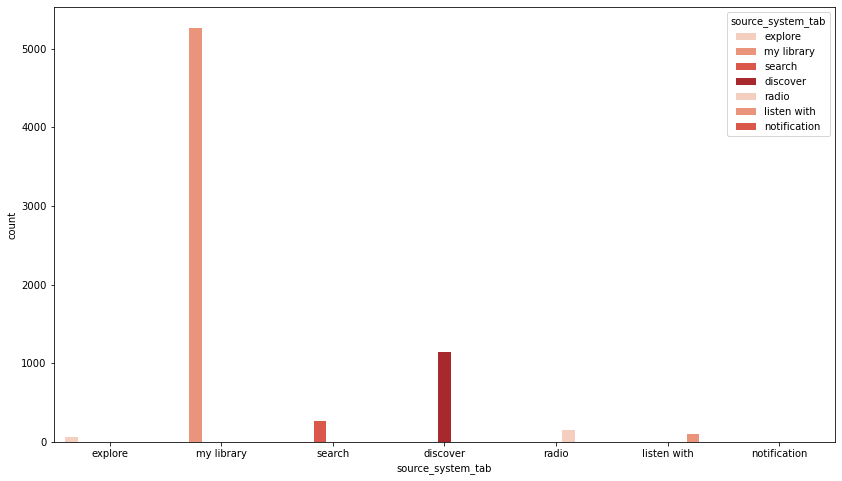

In [59]:
#DATA VISUALIZATION
plt.figure(figsize =(14,8))
red_palette = sns.color_palette("Reds", 4)
sns.countplot(x = train['source_system_tab'], hue=train['source_system_tab'], palette=red_palette)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

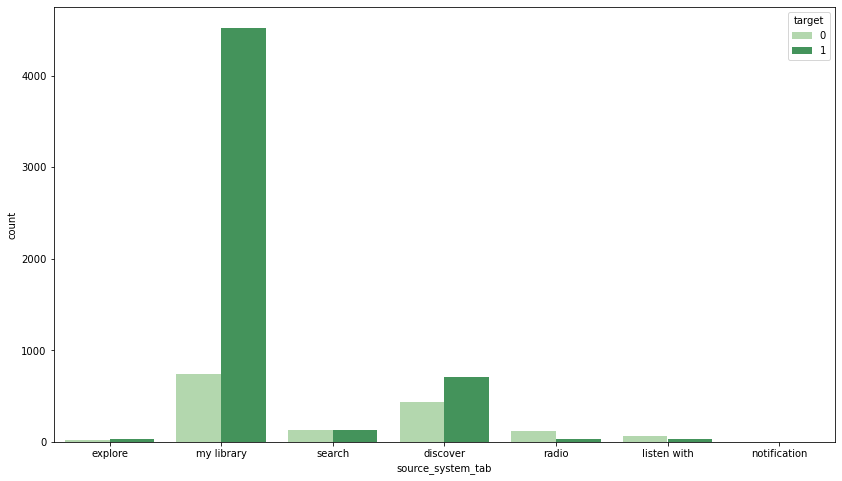

In [65]:
plt.figure(figsize =(14,8))
green_palette = sns.color_palette("Greens", 2)
sns.countplot(x = train['source_system_tab'], hue=train['target'], palette=green_palette)

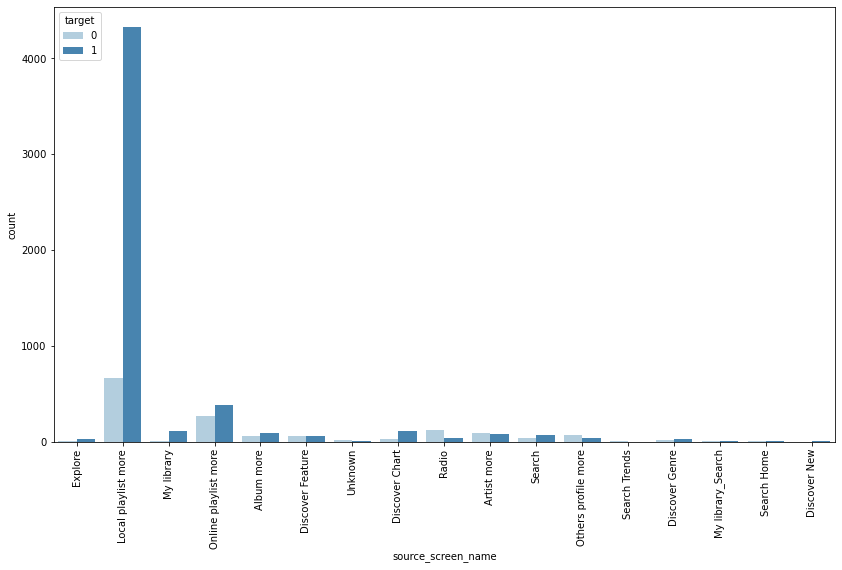

In [64]:
plt.figure(figsize =(14,8))
blue_palette = sns.color_palette("Blues", 2)
sns.countplot(x = train['source_screen_name'], hue=train['target'], palette=blue_palette, data = train, orient = 'v')
plt.xticks(rotation = 90)
plt.show()


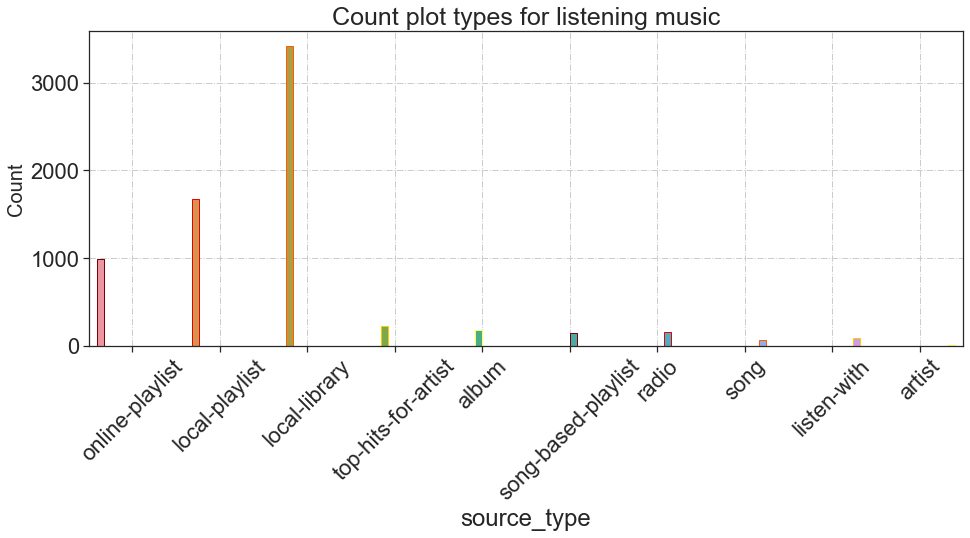

In [87]:
plt.figure(figsize=(14,8))
sns.set(font_scale=2, style='ticks')
sns.set_palette('hot')
sns.countplot(x='source_type', hue='source_type', data = train, edgecolor = sns.color_palette('hot',5))
plt.grid(visible=True, linestyle='-.')
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = '45')
plt.title('Count plot types for listening music', fontsize = 25)
plt.legend().set_visible(False)
plt.tight_layout()


1. Source_system_tab indicates the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions.
2. It can be depicted from the above plot that people repeat songs from their library or discover tabs.
3. From notifications or settings tab people are not interested to repeat songs.

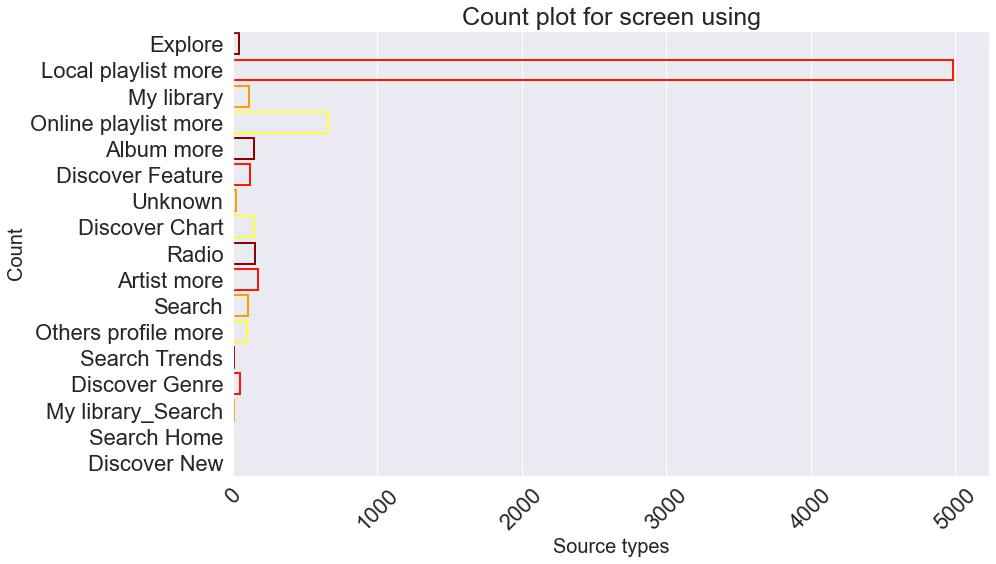

In [91]:
plt.figure(figsize=(14,8))
sns.set(font_scale=2)
sns.countplot(y = 'source_screen_name', data = train, facecolor = (0,0,0,0), linewidth = 2, edgecolor = sns.color_palette('hot',4))
sns.set(style = "darkgrid")
plt.xlabel ('Source types', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = '45')
plt.title('Count plot for screen using', fontsize = 25)
plt.tight_layout()

In [100]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('Count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

• It will take the dataframe, column name of x-axis, hue, and type of data as input and will create a countplot of the data on x-axis and hue of the data.

• It will also set the labels, title, and adjust the subplot parameters for better visualization.

• It will display the plot on the console/output.

In [109]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('Count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

• The Count_plot function will creates a figure with a specified size, sets the font scale, creates a countplot using the seaborn library, sets the x-label, y-label, rotation of x-axis ticks and title of the plot, and adjusts the subplot parameters.

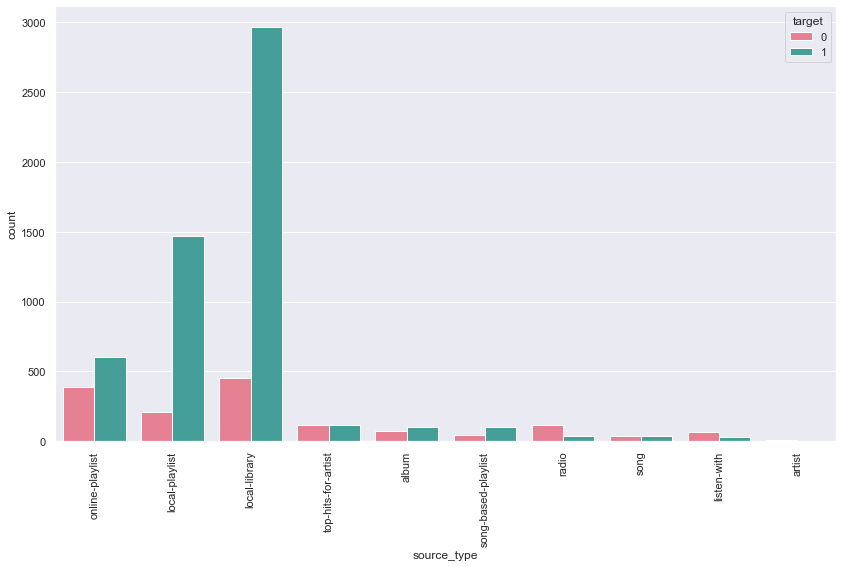

In [128]:
plt.figure(figsize =(14,8))
sns.countplot(x = train['source_type'],palette=sns.color_palette("husl",2),hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

• The countplot will show the count of different 'source_type' and it will color the bars of the 'source_type' according to the values in the 'target' column.

## Performing Data Visualization on members.csv

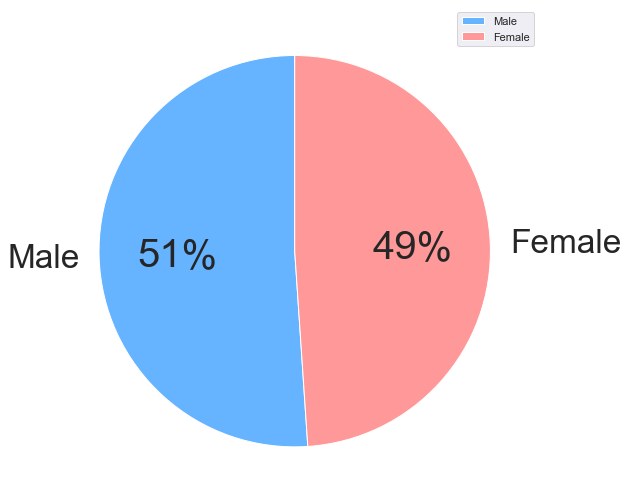

In [123]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (9, 9))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes,labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

The Pie chart displays the proportion of Male and Female in the members dataframe. And the highest as we can see clearly is of male.

<AxesSubplot:xlabel='language', ylabel='count'>

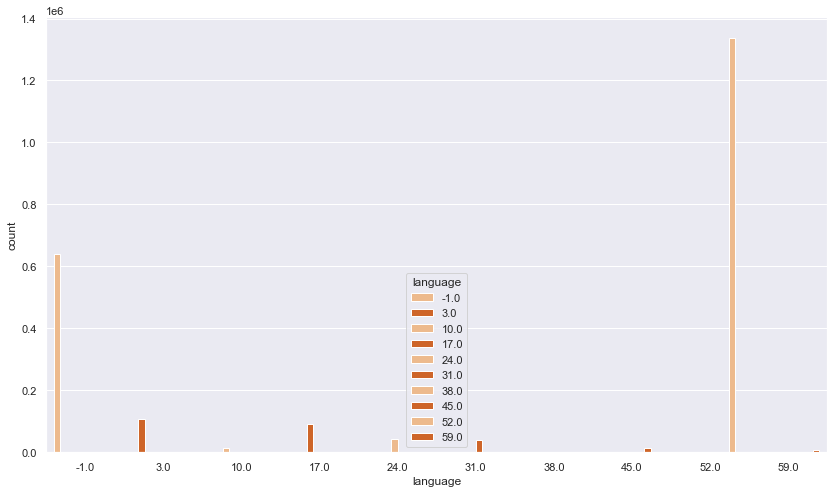

In [129]:
plt.figure(figsize =(14,8))
orange_palette = sns.color_palette("Oranges", 2)
sns.countplot(x = songs['language'],data =train,hue=songs['language'],palette = orange_palette,orient='h')

Text(0.5, 1.0, 'Count Plot')

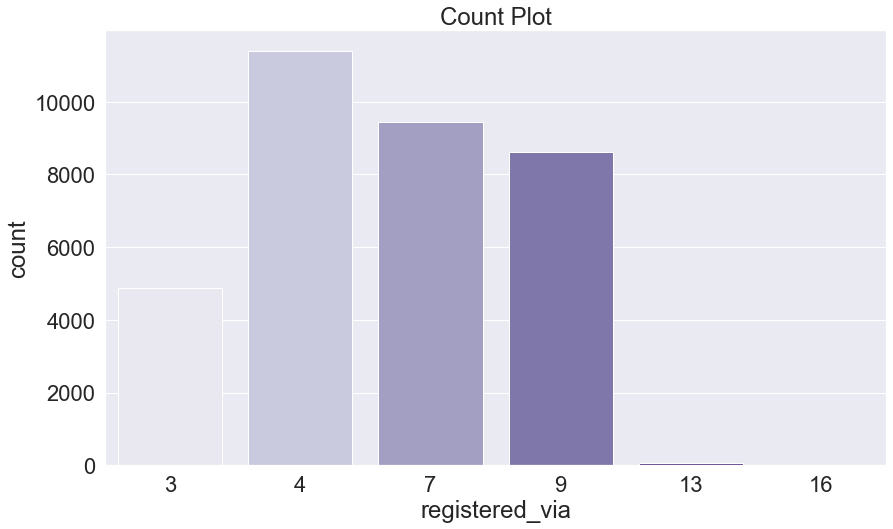

In [141]:
plt.figure(figsize =(14,8))
Purples_palette = sns.color_palette("Purples", 5)
sns.countplot(x = 'registered_via', data = members, palette = Purples_palette)
plt.title("Count Plot")


• Most of the registrations happened via method '4', '7' and '9'.

• A few users have registered themselves via '13' and '16' methods.

Text(0.5, 1.0, 'Count Plot')

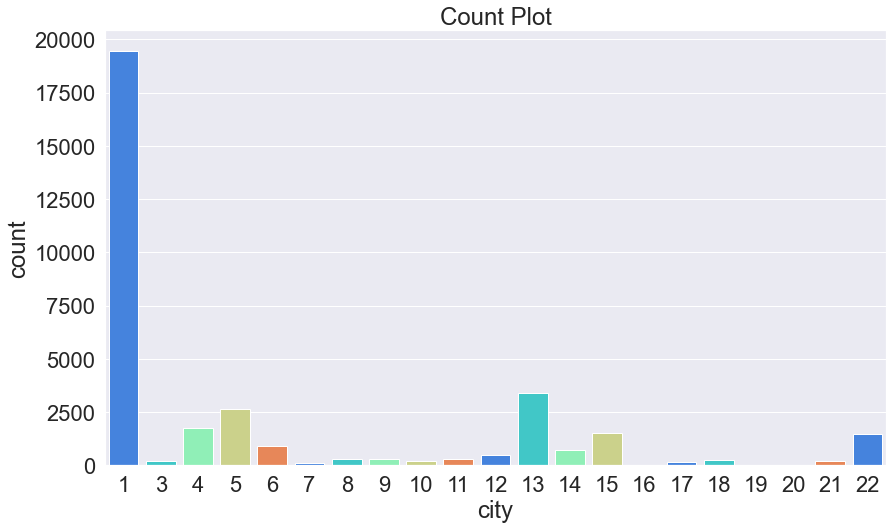

In [144]:
plt.figure(figsize =(14,8))
rainbow_palette = sns.color_palette("rainbow", 5)
sns.countplot(x = 'city', data = members, palette = rainbow_palette)
plt.title("Count Plot")

• Most of the people who used to listen songs are from city labelled '1'. Other cities have very few people who prefer listening music via this music app.

## Performing stats test on members.csv

Text(0.5, 1.0, 'Probability density function for Registration')

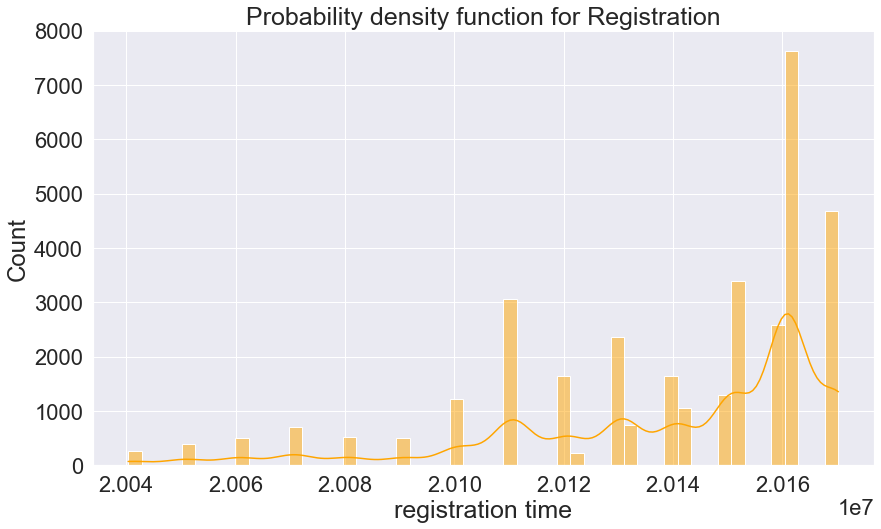

In [150]:
plt.figure(figsize = (14, 8)) 
sns.histplot(members.registration_init_time, color = 'orange', kde=True)
sns.set(font_scale=2)
plt.xlabel('registration time', fontsize=25)
plt.title('Probability density function for Registration', fontsize=25)


This code will create a PDF plot of the registration time of the members dataframe, it shows the probability density of registration_time in the dataset. 
The x-axis shows the registration time, and the y-axis shows the density.

In [160]:
def plot_pdf_cdf(x, flag):
    plt.figure(figsize=(14, 8))
    if flag:
        sns.histplot(x, cumulative=True, element='bars', color='purple')
        plt.title('CDF for age')
    else:
        sns.histplot(x, element='bars', color='purple')
        plt.title('PDF for age')
    sns.set(font_scale=2)


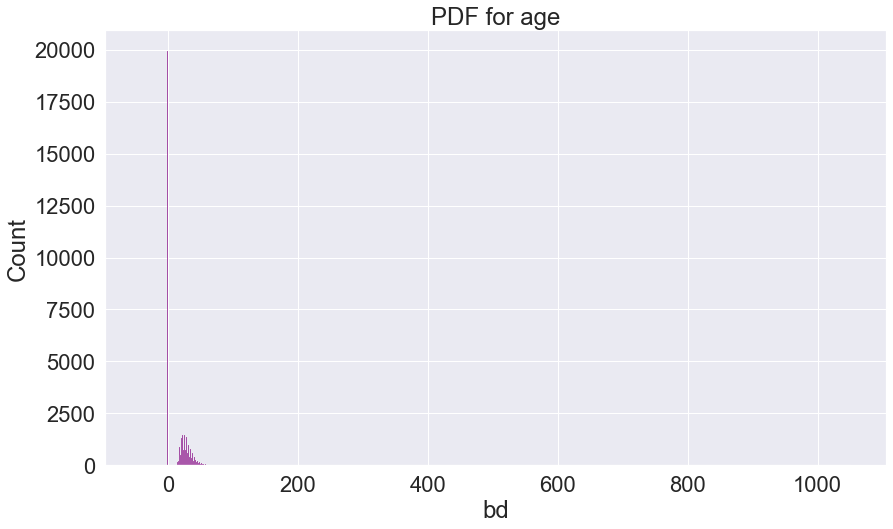

In [162]:
plot_pdf_cdf(members['bd'], False)

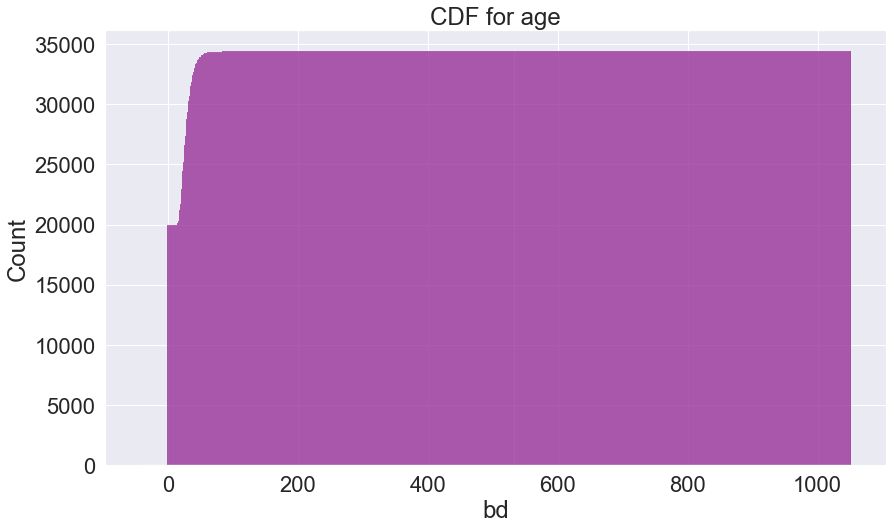

In [163]:
plot_pdf_cdf(members['bd'], True)
plt.show()

 'CDF' stands for Cumulative Distribution Function, it gives the cumulative probability of a random variable taking on a value less than or equal to x.

In [164]:
np.percentile(members['bd'].values, 98)

47.0

1. 98th percentile user is of 47 age. The 98th percentile can be defined as the value below which 98% of the ages in the dataset fall.
2. Means most of the user are below 50.
3. We can also observe via above CDF that almost 99% values are below 50. There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 100 for humans.

## Now Performing Data Preprocessing & Cleaning


In [167]:
test = test_1.drop(['target'],axis=1)
ytr = np.array(test_1['target'])

In [169]:
test_name = ['id','msno','song_id','source_system_tab',
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [170]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

The above code is merging the train and test data with the songs data on the 'song_id' column. It is using the 'left' join type, which means that all rows from the train and test data will be kept and any missing values for the 'song_id' column in the songs data will be filled with NaN.

In [171]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In the above provided code the lambda function is used to extract the year, month and date from the registration_init_time column in a concise and readable way.

In [172]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In the above provided code the lambda function is used to extract the year, month and date from the expiration_date column in a concise and readable way. And,finally it drops the 'registration_init_time' column from the members dataframe using the .drop() method, passing the column name as the first argument and specifying axis=1 to indicate that we want to drop a column and not a row.






In [173]:
train = train.fillna(-1)
test = test.fillna(-1)


The .fillna() method is used to fill any missing values in a dataframe with a specific value. In this case, the missing values are being filled with -1.

In [174]:
import gc #garbage collector
del members, songs; gc.collect()

187533

This is done to free up the memory space occupied by the unnecessary dataframes and to prevent memory overflow.

In [175]:
colm = list(train.columns)
colm.remove('target')

The above code is creating a list of columns from the train dataframe, and then using the list method 'remove' to remove the column 'target' from the list. This is done because the target variable is the variable that we are trying to predict, it should not be included in the list of features to be used for training the model.

In [176]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 9/9 [00:00<00:00, 44.49it/s]


The process is done for all columns in the dataset that have an object data type, which typically corresponds to categorical variables.It is important as most machine learning models take numerical inputs, so it is necessary to convert categorical variables to numerical variables before feeding the data to the model.

In [177]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [178]:
pip install lightgbm


  Using cached lightgbm-3.3.4-py3-none-win_amd64.whl (1.0 MB)


## Model Building 

In [179]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

The above code is splitting the training data into training and validation sets using the train_test_split function from sklearn.model_selection, with a test size of 0.1, which means 10% of the data will be used for validation and the remaining 90% will be used for training. The LightGBM library's Dataset object is then created for the training and validation sets, which is used for training the model. The watchlist variable is a list of Dataset objects that is used to track the model's performance during training.

## Trying out some basic classification models

In [182]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

## Logistic Regression & Random Forest Classifier

In [183]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
predict(m1)

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [184]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier()
predict(m2)

Training Score : 1.0
Accuracy on test data for the model 76.5


In [187]:
pip install xgboost

In [188]:
from xgboost import XGBClassifier
m3 = XGBClassifier()
predict(m3)

Training Score : 0.9466666666666667
Accuracy on test data for the model 77.3


## Prediction using lightgbm

In [204]:
params = {}
params['learning_rate'] = 0.3
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
callbacks=[lgb.early_stopping(10), lgb.log_evaluation(period=10)])


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	training's auc: 0.9

In [192]:
p_test = model1.predict(X_test)

## Printing accuracy of lgbm model on test data

In [205]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 76.500000%
